----------------------
#### Visualizing the embeddings in 2D
---------------------------

- Utilizing t-SNE to reduce the dimensionality of embeddings from 1536 to 2.
- After the dimensionality reduction, the embeddings will be represented in two dimensions.
- The resulting 2D embeddings can be visualized through a scatter plot.

#### 1. Reduce dimensionality
We reduce the dimensionality to 2 dimensions using t-SNE decomposition.

In [1]:
import pandas as pd

from sklearn.manifold import TSNE

import numpy as np
from ast import literal_eval

In [2]:
# Load the embeddings
datafile_path = r"D:\AI-DATASETS\02-MISC-large\GenAI-LLMs\amazon_food_reviews_with_embeddings_2k.csv"
df = pd.read_csv(datafile_path)

In [3]:
df.shape

(2000, 9)

In [4]:
df

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,ada_embedding
0,467784,B000V1O28Y,A1CHFK7Z8ZJBQ7,4,Better than I thought they would be!,These were actually quite tasty despite the ex...,Title: Better than I thought they would be!; C...,58,"[-0.0014599246205762029, -0.015525521710515022..."
1,102286,B001QEB3E6,AY2O7I9BNG2UI,4,"Dog loves them, but I hate the smell","I have a 70 pound lab mix, and he goes nuts fo...","Title: Dog loves them, but I hate the smell; C...",98,"[-0.0015388393076136708, -0.027311380952596664..."
2,228586,B00295IGHS,A37VSXI1MDHBWJ,2,Too runny for my taste,"I bought this to use to give my dogs pills, so...",Title: Too runny for my taste; Content: I boug...,100,"[-0.02648494951426983, -0.0066804438829422, 0...."
3,149371,B006BXUKAA,A2Y2RTN8AZ9C7F,2,Smells like the beans are flavored with alcohol,"When I opened the back, the overwhelming alcoh...",Title: Smells like the beans are flavored with...,88,"[0.010121514089405537, -0.016951696947216988, ..."
4,175998,B007TGO1U8,A2FHXIKEYLW2C0,1,Aftertaste,"I am disappointed in this product. First, ther...",Title: Aftertaste; Content: I am disappointed ...,79,"[-0.016821280121803284, -0.013360410928726196,..."
...,...,...,...,...,...,...,...,...,...
1995,7177,B004OQLIHK,AKHQMSUORSA91,5,Delicious!,I have ordered these raisins multiple times. ...,Title: Delicious!; Content: I have ordered the...,43,"[-0.008575661107897758, -0.01866467483341694, ..."
1996,401971,B0006349W6,A21BT40VZCCYT4,5,Good Training Treat,My dog will come in from outside when I am tra...,Title: Good Training Treat; Content: My dog wi...,48,"[-0.024578744545578957, -0.017611436545848846,..."
1997,462087,B00611F084,A6D4ND3C3BCYV,5,Jamica Me Crazy Coffee,Wolfgang Puck's Jamaica Me Crazy is that wonde...,Title: Jamica Me Crazy Coffee; Content: Wolfga...,40,"[-0.016938867047429085, -0.005307942628860474,..."
1998,267548,B005QKH5HA,A3LR9HCV3D96I3,5,Party Peanuts,Great product for the price. Mix with the Asia...,Title: Party Peanuts; Content: Great product f...,45,"[-0.010856692679226398, -0.016556959599256516,..."


In [5]:
# Convert to a list of lists of floats
matrix = np.array(df.ada_embedding.apply(literal_eval).to_list())

In [6]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components =2, 
            perplexity   =15, 
            random_state =42, 
            init         ='random', 
            learning_rate=200)

vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(2000, 2)

#### 2. Plotting the embeddings
We colour each review by its star rating, ranging from red to green.

We can observe a decent data separation even in the reduced 2 dimensions.

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [8]:
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

In [9]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

In [10]:
colormap = matplotlib.colors.ListedColormap(colors)

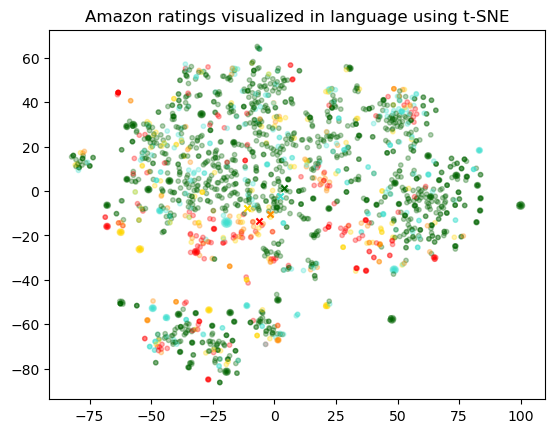

In [11]:
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3, s=10)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=20)

plt.title("Amazon ratings visualized in language using t-SNE");

The visualization seems to have produced roughly 3 clusters, one of which has mostly negative reviews.